In [2]:
import pandas as pd

file_path = "thaivivat.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Sheet1']

In [3]:

df = pd.read_excel(xls, sheet_name="Sheet1")
df.head()

,Audio Log,Result
0,สวัสดีค่ะ/ครับ ติดต่อเรื่องอะไรคะ/ครับ?\n\nต้อ...,0
1,ฮัลโหล ว่างไหม? กำลังคิดอยู่ว่าวันหยุดนี้ไปเที...,0
2,สวัสดีครับ/ค่ะ! วันนี้มีเวลาว่างไหมครับ? ผม/ฉั...,0
3,"""สวัสดีครับ/ค่ะ สบายดีไหมครับ/ค่ะ?""\n\n""สบายดี...",0
4,"""สวัสดีครับพ่อ สบายดีไหมครับ?"" ""สบายดีนะ ลูกเป...",0


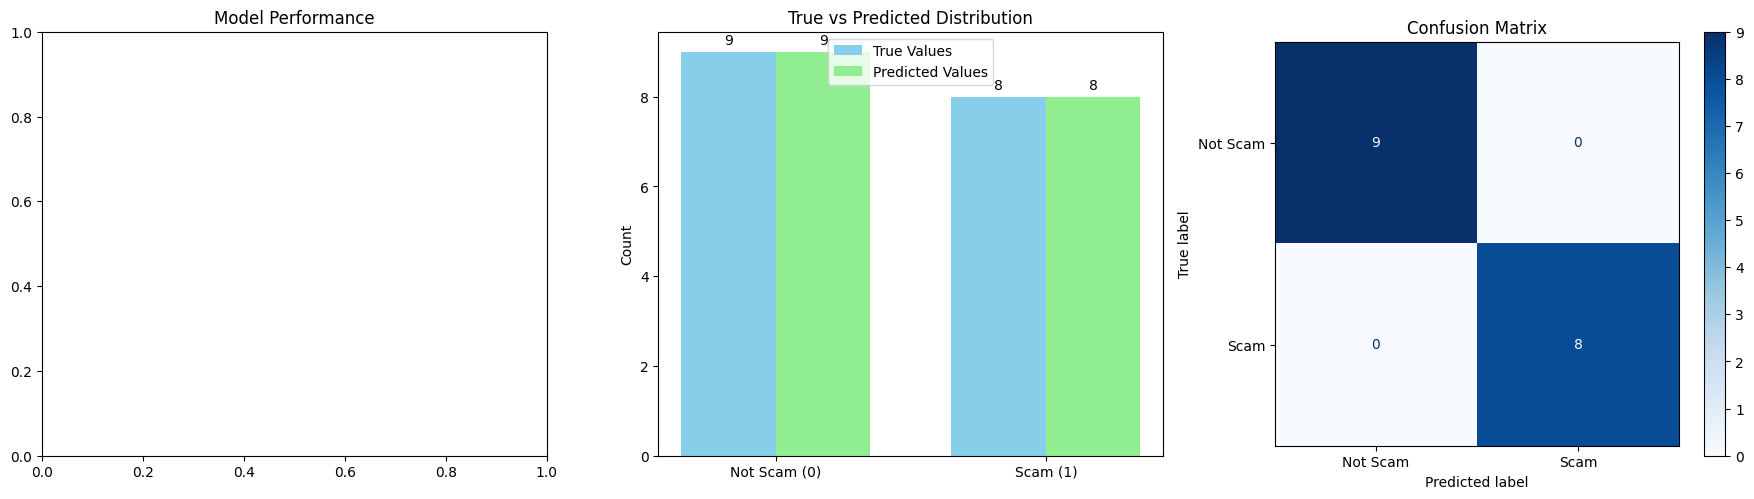


F1 Score: 1.000

True value distribution:
Result
0    9
1    8
Name: count, dtype: int64

Predicted value distribution:
predict
0.0    9
1.0    8
Name: count, dtype: int64

Confusion Matrix:
[[9 0]
 [0 8]]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

# Read the Excel file
df = pd.read_excel("thaivivat.xlsx")

# Drop rows with NaN values
df_clean = df.dropna(subset=["Result", "predict"])

# Calculate F1 score
y_true = df_clean["Result"]
y_pred = df_clean["predict"]
score = f1_score(y_true, y_pred, average='weighted')

# Create a figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: F1 Score as a gauge chart (existing code)
def create_gauge(score, ax):
    # ... (keep existing gauge chart code)
    pass

# Plot 2: Distribution comparison (existing code)
labels = ['Not Scam (0)', 'Scam (1)']
x = np.arange(len(labels))
width = 0.35

true_counts = y_true.value_counts().sort_index()
pred_counts = y_pred.value_counts().sort_index()

rects1 = ax2.bar(x - width/2, true_counts, width, label='True Values', color='skyblue')
rects2 = ax2.bar(x + width/2, pred_counts, width, label='Predicted Values', color='lightgreen')

ax2.set_ylabel('Count')
ax2.set_title('True vs Predicted Distribution')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Plot 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Scam', 'Scam'])
disp.plot(ax=ax3, cmap='Blues', values_format='d')
ax3.set_title('Confusion Matrix')

# Create gauge chart
create_gauge(score, ax1)
ax1.set_title('Model Performance')

plt.tight_layout()
plt.show()

# Print numeric results
print(f"\nF1 Score: {score:.3f}")
print("\nTrue value distribution:")
print(y_true.value_counts())
print("\nPredicted value distribution:")
print(y_pred.value_counts())
print("\nConfusion Matrix:")
print(cm)